In [19]:
import statsmodels.api as sm
from DataPaths import Paths
from DatasetReader import DatasetReader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# res = sm.tsa.seasonal_decompose(data.co2)
# resplot = res.plot()

In [4]:
# Get year of CarCount data
dr = DatasetReader()
contents = dr.read_directories(Paths.full_year_pickle_path)

In [5]:
contents

Directories: ['testfolder']
Files: ['full_year_2016_CarCount.pkl', 'full_year_2017_CarCount.pkl', 'full_year_2020_CarCount.pkl', 'full_year_2021_CarCount.pkl']
Full file paths: ['YOUR_PATH\\data\\full_year_pickles\\full_year_2016_CarCount.pkl', 'YOUR_PATH\\data\\full_year_pickles\\full_year_2017_CarCount.pkl', 'YOUR_PATH\\data\\full_year_pickles\\full_year_2020_CarCount.pkl', 'YOUR_PATH\\data\\full_year_pickles\\full_year_2021_CarCount.pkl']

In [57]:
path_2021 = "YOUR_PATH\\data\\full_year_pickles\\full_year_2020_CarCount.pkl"
df = dr.read_pickle(path_2021)

In [58]:
lam_1 = df[df["lamId"] == 99]
lam_1_dir_1 = lam_1[lam_1["direction"] == 1]
one_weekday = lam_1_dir_1[lam_1_dir_1["day"] % 7 == 0]

In [59]:
year_of_lam_1 = np.concatenate(one_weekday["CarCount"].values)

In [60]:
year_of_lam_1.shape

(14688,)

In [62]:
plt.plot(year_of_lam_1)

In [101]:
len_d = len(year_of_lam_1)
year_series = pd.Series(year_of_lam_1, index=pd.date_range("2020", freq="H", periods=len_d))

In [64]:
res = sm.tsa.seasonal_decompose(year_series)
resplot = res.plot()

In [102]:
summed_car_counts = lam_1_dir_1["CarCount"].map(sum).values

In [103]:
plt.plot(summed_car_counts)

In [93]:
%matplotlib qt
summed_car_year = pd.Series(summed_car_counts, index=pd.date_range(pd.to_datetime("1.9.2020"), freq="D", periods=len(summed_car_counts)))
res = sm.tsa.seasonal_decompose(summed_car_year)
resplot = res.plot()

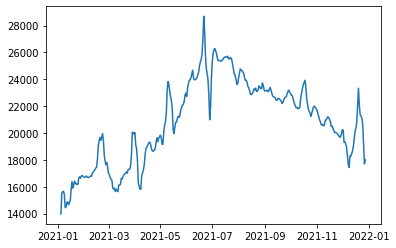

In [55]:
plt.plot(res.trend)

In [79]:
summed_car_year

2020-01-09    13259
2020-01-10    23682
2020-01-11    16904
2020-01-12    13739
2020-01-13    19695
              ...  
2020-12-26    14688
2020-12-27    18170
2020-12-28    15991
2020-12-29    20282
2020-12-30    18674
Freq: D, Length: 357, dtype: int32

In [73]:
lam_1_dir_1["day"]

20      9
20     10
20     11
20     12
20     13
     ... 
24    362
24    363
24    364
24    365
24    366
Name: day, Length: 357, dtype: int64

Timestamp('2020-09-01 00:00:00')

In [81]:
path_2017 = "YOUR_PATH\\data\\full_year_pickles\\full_year_2017_CarCount.pkl"
df2 = dr.read_pickle(path_2017)

In [82]:
lam_1_2017 = df2[df2["lamId"] == 99]
lam_1_2017_dir_1 = lam_1_2017[lam_1_2017["direction"] == 1]
one_weekday = lam_1_2017_dir_1[lam_1_2017_dir_1["day"] % 7 == 0]

In [100]:
%matplotlib qt
summed_car_counts_2017 = lam_1_2017_dir_1["CarCount"].map(sum).values
summed_car_year_2017 = pd.Series(summed_car_counts_2017, index=pd.date_range(pd.to_datetime("1.1.2017"), freq="D", periods=len(summed_car_counts_2017)))
res2 = sm.tsa.seasonal_decompose(summed_car_year_2017)
resplot = res2.plot()

In [90]:
days = lam_1_2017_dir_1["day"].unique()

In [91]:
for i in range(1, 366):
  if i not in days:
    print(i)

198
199
200
201
202
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228


In [98]:
plt.plot(res.trend-res2.trend)